Regstration Number : 2010722

#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the dataset into a dataframe df_p3
df_p3=pd.read_csv("D:\Lab_Work\CE802_Assignment2\CE802_P3_Data\CE802_P3_Data.csv")

In [3]:
# Displaying the first six rows of the dataframe
df_p3.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,11.85,-258.09,-6.95,2557.29,Low,Europe,7.59,-28.22,-259.22,-1578.12,-141.76,9,6,20.19,169.26,1.64,999.41
1,11.99,-169.71,-16.06,2862.87,Low,Rest,2.57,-13.76,-321.80,-1914.16,-165.83,6,6,9.51,6259.05,0.08,0.00
2,3.48,-317.76,-8.14,2175.81,Medium,UK,1.60,-32.76,-253.54,457.12,-203.87,15,10,7.02,38504.82,6.40,266.29
3,14.75,-394.26,-5.61,1927.86,Low,UK,7.33,-13.42,-149.86,-1972.04,-145.52,6,10,33.99,20883.90,21.98,598.77
4,10.25,-365.46,-10.33,3187.98,High,USA,4.37,-32.66,-224.58,-2022.36,-153.94,12,10,4.29,12095.91,2167.48,396.90


In [4]:
# Finding the datatypes of all the features
df_p3.dtypes

F1        float64
F2        float64
F3        float64
F4        float64
F5         object
F6         object
F7        float64
F8        float64
F9        float64
F10       float64
F11       float64
F12         int64
F13         int64
F14       float64
F15       float64
F16       float64
Target    float64
dtype: object

In [5]:
df_p3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   object 
 5   F6      1500 non-null   object 
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   int64  
 12  F13     1500 non-null   int64  
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  Target  1500 non-null   float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


In [66]:
# Checking for missing values
df_p3.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
Target    0
dtype: int64

There are no missing/Null values in the given dataset

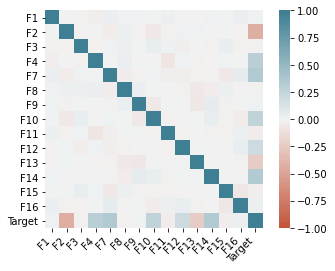

In [6]:
# Checking corelation among the variables
corr = df_p3.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

It is observed from the heat map that no two vaiables are highly corelated, Therefore the analysis is performed using all the features.

In [7]:
# Encoding variables F5 and F6 since they are catogorical variables.
X_enc = df_p3[['F5','F6']]
X_enc = pd.get_dummies(data=X_enc, drop_first=True)

In [8]:
df_p3_New = pd.concat([df_p3,X_enc],axis=1)
df_p3_New = df_p3_New.drop(['F5'], axis = 1)
df_p3_New = df_p3_New.drop(['F6'], axis = 1)

In [9]:
df_p3_New.head()

,F1,F2,F3,F4,F7,F8,F9,F10,F11,F12,...,F15,F16,Target,F5_Low,F5_Medium,F5_Very high,F5_Very low,F6_Rest,F6_UK,F6_USA
0,11.85,-258.09,-6.95,2557.29,7.59,-28.22,-259.22,-1578.12,-141.76,9,...,169.26,1.64,999.41,1,0,0,0,0,0,0
1,11.99,-169.71,-16.06,2862.87,2.57,-13.76,-321.80,-1914.16,-165.83,6,...,6259.05,0.08,0.00,1,0,0,0,1,0,0
2,3.48,-317.76,-8.14,2175.81,1.60,-32.76,-253.54,457.12,-203.87,15,...,38504.82,6.40,266.29,0,1,0,0,0,1,0
3,14.75,-394.26,-5.61,1927.86,7.33,-13.42,-149.86,-1972.04,-145.52,6,...,20883.90,21.98,598.77,1,0,0,0,0,1,0
4,10.25,-365.46,-10.33,3187.98,4.37,-32.66,-224.58,-2022.36,-153.94,12,...,12095.91,2167.48,396.90,0,0,0,0,0,0,1


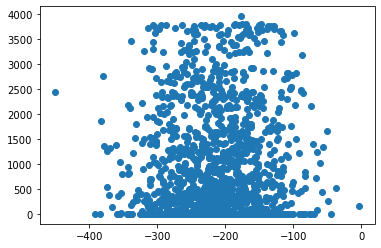

In [10]:
plt.scatter(df_p3_New.F9, df_p3_New.Target)

In [11]:
# Seperating input and target variable from df_p3_New dataset
df_p3_New_features=df_p3_New.drop(['Target'],axis=1)
df_p3_New_outcome=df_p3_New['Target']
print(df_p3_New_features.head())
print(df_p3_New_outcome.head())

      F1      F2     F3       F4    F7     F8      F9      F10     F11  F12  \
0  11.85 -258.09  -6.95  2557.29  7.59 -28.22 -259.22 -1578.12 -141.76    9   
1  11.99 -169.71 -16.06  2862.87  2.57 -13.76 -321.80 -1914.16 -165.83    6   
2   3.48 -317.76  -8.14  2175.81  1.60 -32.76 -253.54   457.12 -203.87   15   
3  14.75 -394.26  -5.61  1927.86  7.33 -13.42 -149.86 -1972.04 -145.52    6   
4  10.25 -365.46 -10.33  3187.98  4.37 -32.66 -224.58 -2022.36 -153.94   12   

   ...    F14       F15      F16  F5_Low  F5_Medium  F5_Very high  \
0  ...  20.19    169.26     1.64       1          0             0   
1  ...   9.51   6259.05     0.08       1          0             0   
2  ...   7.02  38504.82     6.40       0          1             0   
3  ...  33.99  20883.90    21.98       1          0             0   
4  ...   4.29  12095.91  2167.48       0          0             0   

   F5_Very low  F6_Rest  F6_UK  F6_USA  
0            0        0      0       0  
1            0        1     

In [12]:
# Splitting the data into training and test
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_p3_New_features, df_p3_New_outcome, test_size=0.2,random_state=42)

In [24]:
# Reading the dataset into a dataframe df_p3_test
df_p3_test=pd.read_csv("D:\Lab_Work\CE802_Assignment2\CE802_P3_Data\CE802_P3_Test.csv")

In [25]:
df_p3_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,11.23,-195.54,-1.19,1468.56,Very high,USA,8.97,-23.62,-249.36,-854.18,-155.20,12,10,12.39,-3480.87,0.04,NaN
1,14.89,-426.24,-1.18,3049.08,Very high,USA,6.33,-39.26,-226.26,-2126.68,-159.42,9,8,5.19,8831.19,43.68,NaN
2,6.76,-493.47,-13.55,3197.13,Very low,USA,1.77,-25.84,-238.30,-2270.78,-212.73,12,10,3.30,-4468.44,0.52,NaN
3,15.12,-320.04,-12.17,2436.00,Very low,Rest,5.42,-17.32,-203.64,-304.24,-100.34,18,12,6.51,22851.60,758.54,NaN
4,10.12,-387.99,-7.11,2800.89,Very low,Europe,1.39,-12.78,-265.16,-1419.76,-137.49,0,14,14.22,24396.09,0.68,NaN


In [26]:
# Encoding variables F5 and F6 since they are catogorical variables.
X_enc = df_p3_test[['F5','F6']]
X_enc = pd.get_dummies(data=X_enc, drop_first=True)

In [29]:
df_p3_test_New = pd.concat([df_p3_test,X_enc],axis=1)
df_p3_test_New = df_p3_test_New.drop(['F5'], axis = 1)
df_p3_test_New = df_p3_test_New.drop(['F6'], axis = 1)

In [30]:
df_p3_test_New.head()

,F1,F2,F3,F4,F7,F8,F9,F10,F11,F12,...,F15,F16,Target,F5_Low,F5_Medium,F5_Very high,F5_Very low,F6_Rest,F6_UK,F6_USA
0,11.23,-195.54,-1.19,1468.56,8.97,-23.62,-249.36,-854.18,-155.20,12,...,-3480.87,0.04,NaN,0,0,1,0,0,0,1
1,14.89,-426.24,-1.18,3049.08,6.33,-39.26,-226.26,-2126.68,-159.42,9,...,8831.19,43.68,NaN,0,0,1,0,0,0,1
2,6.76,-493.47,-13.55,3197.13,1.77,-25.84,-238.30,-2270.78,-212.73,12,...,-4468.44,0.52,NaN,0,0,0,1,0,0,1
3,15.12,-320.04,-12.17,2436.00,5.42,-17.32,-203.64,-304.24,-100.34,18,...,22851.60,758.54,NaN,0,0,0,1,1,0,0
4,10.12,-387.99,-7.11,2800.89,1.39,-12.78,-265.16,-1419.76,-137.49,0,...,24396.09,0.68,NaN,0,0,0,1,0,0,0


In [31]:
# Seperating input and target variable from df_p3_test_New dataset
df_p3_test_New_features=df_p3_test_New.drop(['Target'],axis=1)
df_p3_test_New_outcome=df_p3_test_New['Target']
print(df_p3_test_New_features.head())
print(df_p3_test_New_outcome.head())

      F1      F2     F3       F4    F7     F8      F9      F10     F11  F12  \
0  11.23 -195.54  -1.19  1468.56  8.97 -23.62 -249.36  -854.18 -155.20   12   
1  14.89 -426.24  -1.18  3049.08  6.33 -39.26 -226.26 -2126.68 -159.42    9   
2   6.76 -493.47 -13.55  3197.13  1.77 -25.84 -238.30 -2270.78 -212.73   12   
3  15.12 -320.04 -12.17  2436.00  5.42 -17.32 -203.64  -304.24 -100.34   18   
4  10.12 -387.99  -7.11  2800.89  1.39 -12.78 -265.16 -1419.76 -137.49    0   

   ...    F14       F15     F16  F5_Low  F5_Medium  F5_Very high  F5_Very low  \
0  ...  12.39  -3480.87    0.04       0          0             1            0   
1  ...   5.19   8831.19   43.68       0          0             1            0   
2  ...   3.30  -4468.44    0.52       0          0             0            1   
3  ...   6.51  22851.60  758.54       0          0             0            1   
4  ...  14.22  24396.09    0.68       0          0             0            1   

   F6_Rest  F6_UK  F6_USA  
0        0

# Linear Regression Model

In [45]:
lm_reg_model = linear_model.LinearRegression()
lm_reg_model.fit(X_train, y_train)

LinearRegression()

In [46]:
#predictions on test set
lm_reg_pred = lm_reg_model.predict(X_test)
lm_reg_pred

array([ 1.06675099e+03,  6.69661728e+02,  7.73108275e+02,  2.02130543e+03,
        7.17748381e+02, -3.34521175e+02,  9.15159260e+02,  2.13572693e+03,
        1.54446959e+03,  3.17677521e+03,  1.31890157e+03,  1.78312797e+03,
        3.51728999e+02,  6.58140006e+02,  8.01016588e+02,  2.08285246e+01,
        5.76422084e+02,  1.27457169e+03,  1.66158005e+03,  3.74941401e+02,
        1.87398467e+03, -6.21384283e+00,  2.03992236e+03,  6.07380989e+02,
        4.12784053e+03,  5.65632783e+02,  2.06551870e+03,  2.91813848e+02,
        1.63504106e+03,  1.91103687e+03,  1.49582982e+03,  9.76273530e+02,
        4.36491074e+02, -2.01452930e+02,  8.64748114e+02,  4.80029084e+02,
       -6.78050705e+01,  3.31344667e+03,  3.74710724e+02,  6.71829455e+02,
        1.31155664e+02,  2.26227219e+03, -2.59556677e+01,  8.71184155e+02,
        8.46990864e+02,  1.19975605e+03,  1.41762101e+03,  5.13420554e+02,
        1.67486971e+02,  1.87754195e+03,  1.50963928e+03,  1.67513656e+03,
        2.73814449e+03, -

C:\Users\dushyanth\miniconda3\envs\ce802\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Target'>

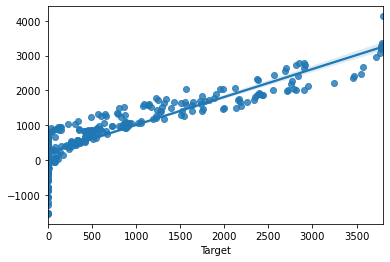

In [47]:
sns.regplot(y_test,lm_reg_pred)

In [62]:
lm_predictions = lm_reg_model.predict(df_p3_test_New_features)

In [50]:
metrics.mean_squared_error(y_test, lm_reg_pred)

219483.52569672914

# Random Forest Regression using grid search CV

In [37]:
#Random Forest Regression using grid search CV 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
param_grid = {'bootstrap': [True],
              'max_depth': [50, 70, 90, 120],
              'max_features':[2, 3, 4],
              'min_samples_leaf': [4, 5, 6],
              'n_estimators': [100,200,300,500]}
rf_reg = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf_reg, param_grid = param_grid, cv=3, n_jobs = -1, verbose = 2)

In [16]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   50.1s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [50, 70, 90, 120],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [4, 5, 6],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=2)

In [18]:
print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=50, max_features=4, min_samples_leaf=4,
                      n_estimators=500)


In [33]:
best_rf_regcv = RandomForestRegressor(max_depth=50, max_features=4, min_samples_leaf=4, n_estimators=500, random_state=10)
best_rf_regcv.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, max_features=4, min_samples_leaf=4,
                      n_estimators=500, random_state=10)

In [42]:
pred_re_regcv = best_rf_regcv.predict(X_test)
pred_re_regcv

array([1117.79684746, 1068.96009138,  516.77306245, 1576.36172187,
       1061.6188956 ,  251.84338712, 1049.57005354, 2080.93582687,
       1552.44544968, 1881.0704386 , 1040.11962534, 1472.30875093,
        571.50455483, 1056.54315196,  372.38432412,  269.31782525,
        518.53120339, 1402.38120838, 1343.82434682,  507.42419631,
       1827.28747737,  388.40233076, 1893.93412173,  671.90121425,
       2752.20745763,  682.69995607, 1434.16897709,  393.22264845,
       1483.33065723, 1890.78358798, 1188.8350713 ,  485.44514491,
        829.07053311,  355.69943682,  811.42983632,  622.52815126,
        573.18905326, 1694.58445289, 1136.45802137, 1146.64272957,
        632.1817304 , 1340.45506483,  303.8238868 ,  726.0636789 ,
        970.26380749,  574.80913392, 1266.70797287,  397.39467591,
        638.0167678 , 1157.51781141, 1170.90489733, 1241.06206084,
       1863.13440506,  195.80764973, 1774.11395688, 1048.18915743,
       1724.03328487,  688.45740995, 1708.97383562,  655.11625

In [35]:
#predections on new data
predictions_new = best_rf_regcv.predict(df_p3_test_New_features)
predictions_new

array([1369.69701758, 1748.7995647 , 1360.20579092, ...,   73.35497653,
        195.49515654, 1183.66428463])

In [43]:
# Mean square error of the bestfit model
metrics.mean_squared_error(y_test, pred_re_regcv)

401333.8596679993

# Decesion Tree Regressor

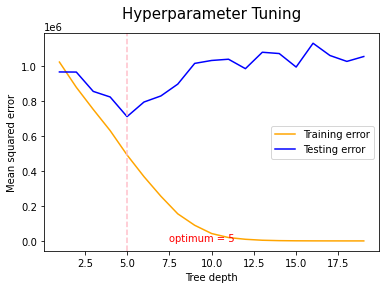

In [53]:
# using Decesion Tree Regressor to predict the values
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)
train_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(df_p3_New_features, df_p3_New_outcome)
    train_error.append(mse(df_p3_New_outcome, model_1.predict(df_p3_New_features)))
    
test_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    test_error.append(mse(y_test, model_2.predict(X_test)))

plt.plot(max_depths, train_error, color='orange', label='Training error')
plt.plot(max_depths, test_error, color='blue', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=5, color='pink', linestyle='--')
plt.annotate('optimum = 5', xy=(7.5, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.savefig('error.png')

In [55]:
# performing grid search CV

model_dtr = DecisionTreeRegressor()
gridsearch_dtr = GridSearchCV(model_dtr,
                  param_grid = {'max_depth': range(1, 10),
                                'min_samples_split': range(10, 30, 10)},
                  cv=5,
                  n_jobs=-1,
                  scoring='neg_mean_squared_error')
gridsearch_dtr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(10, 30, 10)},
             scoring='neg_mean_squared_error')

In [56]:
print(gridsearch_dtr.best_params_)

{'max_depth': 6, 'min_samples_split': 20}


In [58]:
#applying the best parameters from above results to train the model
new_model = DecisionTreeRegressor(max_depth=6,
                                  min_samples_split=20)
new_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=20)

In [59]:
#new predictions on test data
predictions = new_model.predict(X_test)
predictions

array([1367.94076923, 2530.72823529,  203.27944444, 1014.71636364,
       1688.24363636,   53.85766467,  291.81280488, 1628.0352381 ,
       2530.72823529, 2679.00384615,  363.35849315, 2388.98666667,
        291.81280488, 1014.71636364,   53.85766467,   53.85766467,
        363.35849315, 1476.17875   , 2913.188     ,  363.35849315,
       1628.0352381 ,  363.35849315, 2903.65      , 1014.71636364,
       2903.65      ,  950.51842105, 1520.21972973,  363.35849315,
       3459.98333333, 2701.00090909, 2903.65      ,  363.35849315,
        748.79333333,  291.81280488,  291.81280488,  795.74428571,
        291.81280488,  729.66714286, 2679.00384615,  399.55963636,
       1688.24363636, 2679.00384615,   53.85766467,  363.35849315,
        548.55608696,  363.35849315, 2105.67384615,   53.85766467,
        399.55963636,  610.79866667,  795.74428571,  610.79866667,
       2903.65      ,   53.85766467, 2679.00384615,  587.70666667,
       1688.24363636, 2439.73      , 2512.07894737,  729.66714

In [60]:
#predictions on Unseen data
new_predict_dtr = new_model.predict(df_p3_test_New_features)
new_predict_dtr

array([ 610.79866667, 1367.94076923, 1367.94076923, ...,   53.85766467,
        363.35849315,  748.79333333])

In [61]:
# Mean square error of the DTR
metrics.mean_squared_error(y_test, predictions)

744143.1367566203

 After applying Linear Regression, Random Forest Regresion and Decision Tree Regression regression methods, It is observed that 
 Linear Regression had the least mean square error and is an ideal choice to predict the given amount of a new customer will spend in a month.  

In [64]:
# Transfering the prediction data to test csv file.

df_p3_test['Target'] = lm_predictions
df_p3_test.to_csv('CE802_P3_Test.csv')

In [65]:
df_p3_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,11.23,-195.54,-1.19,1468.56,Very high,USA,8.97,-23.62,-249.36,-854.18,-155.20,12,10,12.39,-3480.87,0.04,1347.425860
1,14.89,-426.24,-1.18,3049.08,Very high,USA,6.33,-39.26,-226.26,-2126.68,-159.42,9,8,5.19,8831.19,43.68,1809.492513
2,6.76,-493.47,-13.55,3197.13,Very low,USA,1.77,-25.84,-238.30,-2270.78,-212.73,12,10,3.30,-4468.44,0.52,885.151905
3,15.12,-320.04,-12.17,2436.00,Very low,Rest,5.42,-17.32,-203.64,-304.24,-100.34,18,12,6.51,22851.60,758.54,745.608424
4,10.12,-387.99,-7.11,2800.89,Very low,Europe,1.39,-12.78,-265.16,-1419.76,-137.49,0,14,14.22,24396.09,0.68,-218.137550
